In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [6]:
train_df = pd.read_csv('C:/Users/User/Downloads/train.csv') # .......................................... diff
test_df = pd.read_csv('C:/Users/User/Downloads/test.csv') # ............................................ diff

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
train_df.describe(include=object).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [10]:
# check missing values

# 1. Identify Missing Values (Boolean DataFrame)
missing_values_bool = train_df.isna()

# 2. Count Missing Values per Column
missing_values_count = missing_values_bool.sum()
print("Number of missing values per column:")
print(missing_values_count)

# 3. Get the Total Number of Missing Values
total_missing_values = missing_values_count.sum()
print(f"\nTotal number of missing values in the DataFrame: {total_missing_values}")

Number of missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total number of missing values in the DataFrame: 866


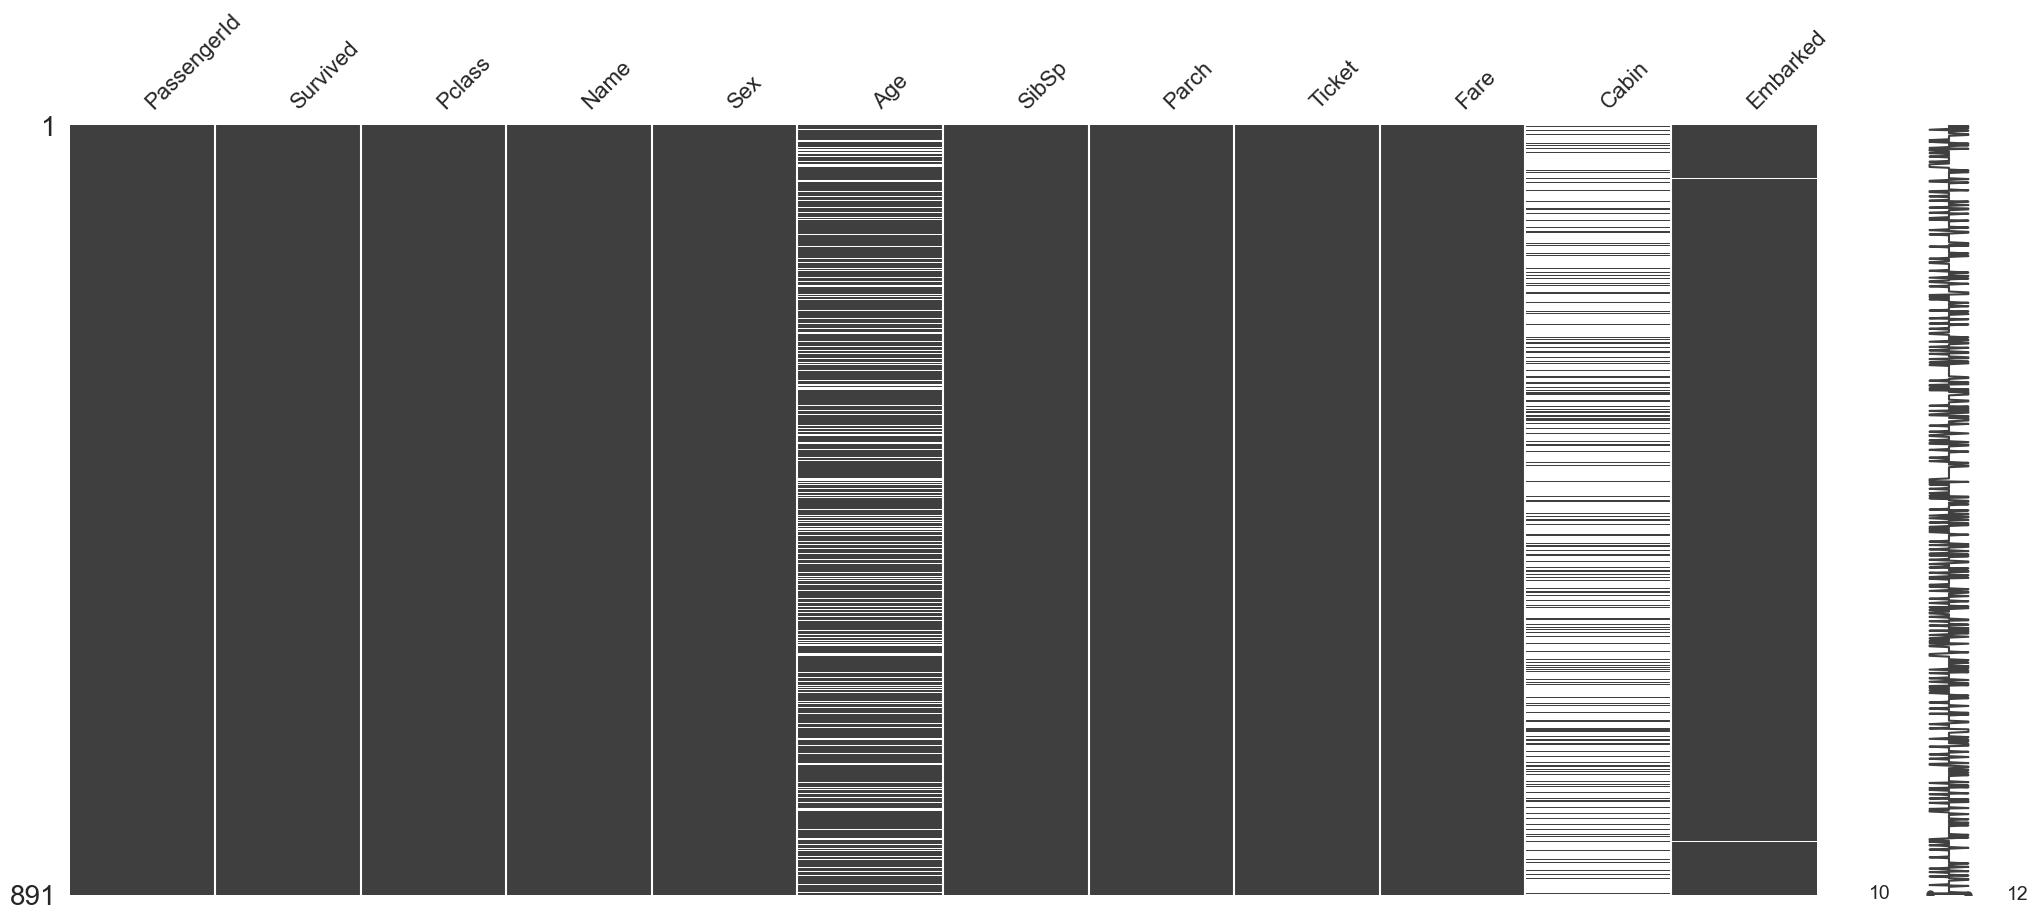

In [11]:
# check missing values (visual - misingno)
msno.matrix(train_df)
plt.show()

In [12]:
# check duplicated values

# 1. Identify Duplicate Rows
duplicate_series = train_df.duplicated()

# 2. Count Duplicate Rows
number_of_duplicates = duplicate_series.sum()
print(f"Number of duplicate rows: {number_of_duplicates}")

# 3. View Duplicate Rows (Optional)
if number_of_duplicates > 0:
    duplicate_rows = df[duplicate_series]
    print("\nDuplicate rows:")
    print(duplicate_rows)
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


Counts of survivors:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


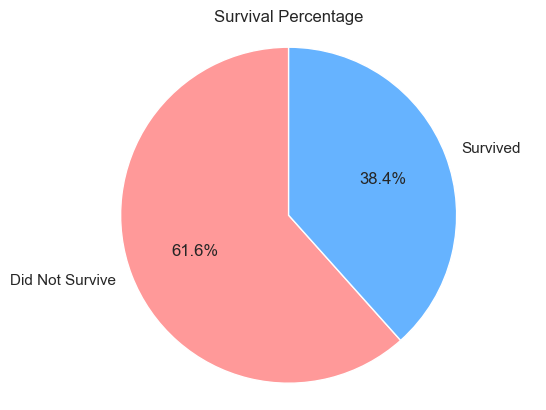

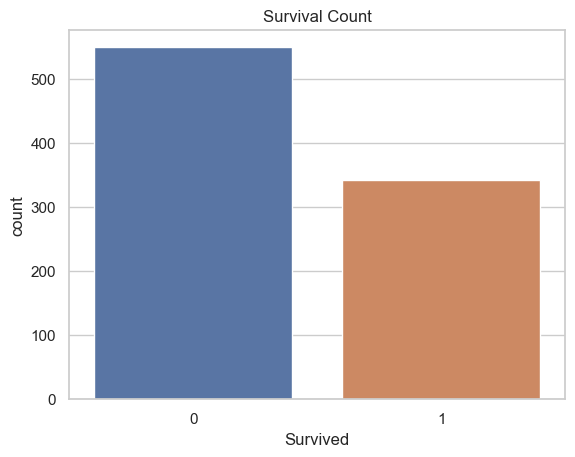

In [13]:
# check distribution

# 1. Get the value counts of the 'Survived' column
survived_counts = train_df['Survived'].value_counts(normalize=True)
print("Counts of survivors:\n", survived_counts)

# 2. Create a pie chart
plt.pie(survived_counts.values, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
plt.title('Survival Percentage')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle.
plt.show()

# 3. Create a bar chart
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

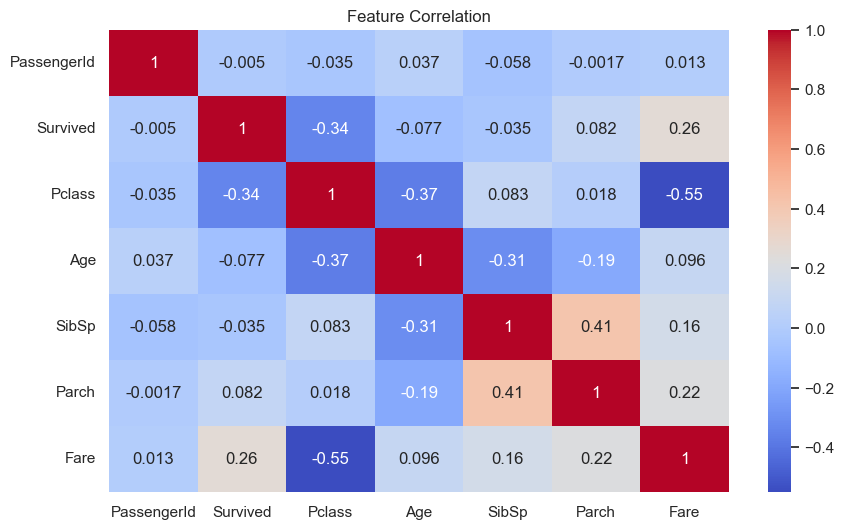

In [14]:
# super cool
plt.figure(figsize=(10,6))
sns.heatmap(train_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

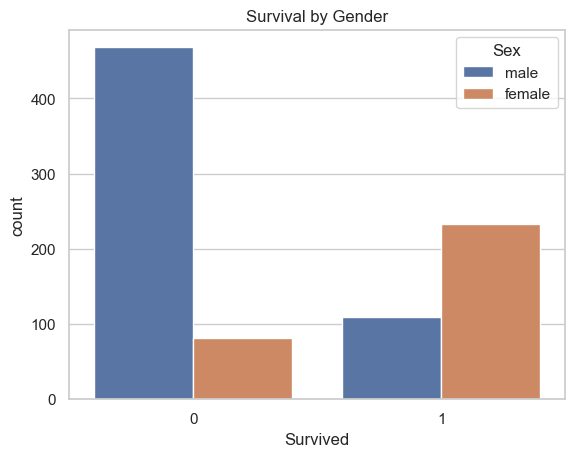

In [15]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

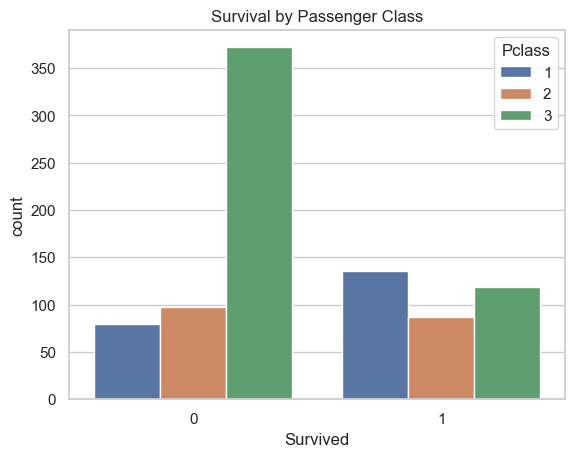

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

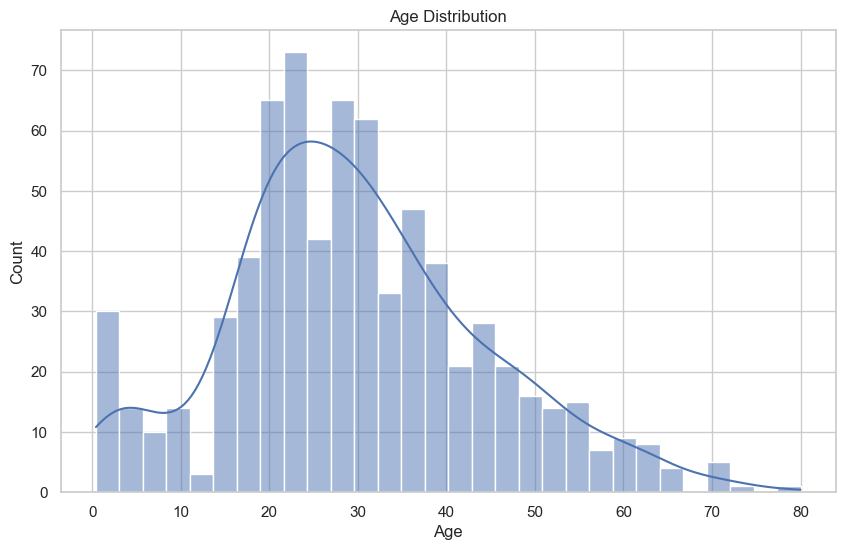

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

In [18]:
# Drop Unnecessary Columns
# PassengerId, Name, Ticket, and Cabin aren’t useful for prediction as-is.

train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
# Handle Missing Values

train_df.isnull().sum()

# Age: fill with median (safer than mean due to outliers)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Embarked: fill with mode (most common port)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fare in test: fill with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [20]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [21]:
train_df.head()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Prep the data
df = train_df.copy()

# Drop PassengerId (not a predictor)
df.drop('PassengerId', axis=1, inplace=True)

# One‑hot encode Sex and Embarked
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Features & target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2️⃣ Split (stratify to keep the survived ratio consistent)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3️⃣ Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      # number of trees
    random_state=42,
    class_weight='balanced'  # helps with the moderate class imbalance
)
rf.fit(X_train, y_train)

# 4️⃣ Evaluate
y_pred = rf.predict(X_valid)

print("🔹 Accuracy:", accuracy_score(y_valid, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_valid, y_pred))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_valid, y_pred))


🔹 Accuracy: 0.8156424581005587

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

🔹 Confusion Matrix:
 [[96 14]
 [19 50]]


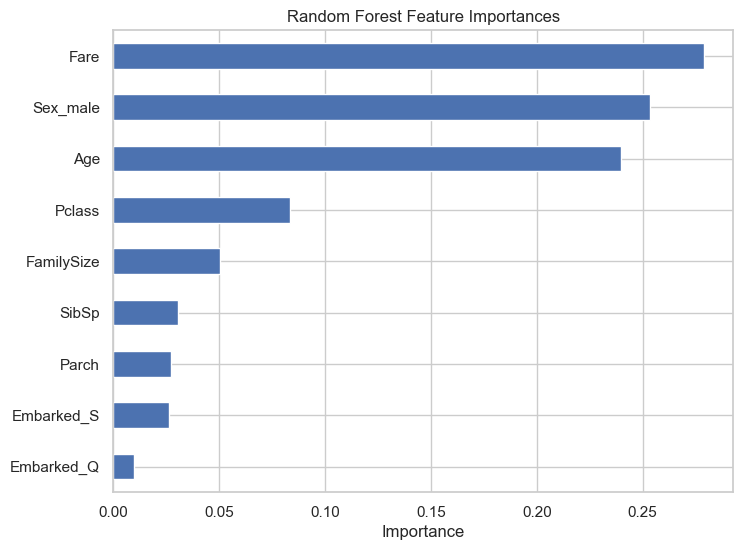

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# grab importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

# barh plot
plt.figure(figsize=(8,6))
importances.plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()